# Fake News Detection:

## Problem Statement:
Developing a machine learning program to identify when an article might be fake news.
## Dataset
1. train.csv: A full training dataset with the following attributes:
2. id: unique id for a news article
3. title: the title of a news article
4. author: author of the news article
5. text: the text of the article; could be incomplete
6. label: a label that marks the article as potentially unreliable. Where 1: unreliable and 0: reliable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn

In [2]:
data = pd.read_csv("data/train.csv")

## Data Exploration

In [3]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
data.size


104000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
data.shape

(20800, 5)

In [7]:
data.columns


Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [8]:
data.isna()

,id,title,author,text,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
20795,False,False,False,False,False
20796,False,False,False,False,False
20797,False,False,False,False,False
20798,False,False,False,False,False


In [9]:
data.isnull()

,id,title,author,text,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
20795,False,False,False,False,False
20796,False,False,False,False,False
20797,False,False,False,False,False
20798,False,False,False,False,False


In [10]:
data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [11]:
data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [12]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [13]:
data_new = data.copy()

In [14]:
data_new.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [15]:
data_new.items()

<generator object DataFrame.items at 0x000000000B512A50>

In [16]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


## Turning object datatypes into category

In [17]:
for label, content in data_new.items():
    if pd.api.types.is_string_dtype(content):
        data_new[label] = content.astype("category").cat.as_ordered()

In [18]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      20800 non-null  int64   
 1   title   20242 non-null  category
 2   author  18843 non-null  category
 3   text    20761 non-null  category
 4   label   20800 non-null  int64   
dtypes: category(3), int64(2)
memory usage: 2.2 MB


In [19]:
data_new.title.cat.codes

0         7609
1         5854
2        18702
3          145
4         8529
         ...  
20795    12919
20796    10800
20797     9965
20798    10851
20799    18320
Length: 20800, dtype: int16

In [20]:
data_new.author.cat.codes

0         940
1         908
2         826
3        1776
4        1498
         ... 
20795    1762
20796     498
20797    2617
20798     140
20799     994
Length: 20800, dtype: int16

## Turning categories into numericals

In [21]:
for label, content in data_new.items():
    if not pd.api.types.is_numeric_dtype(content):
        data_new[label] = pd.Categorical(content).codes+1

In [22]:
data_new.head()

,id,title,author,text,label
0,0,7610,941,8022,1
1,1,5855,909,6298,0
2,2,18703,827,19126,1
3,3,146,1777,17465,1
4,4,8530,1499,13020,1


In [23]:
data_new

,id,title,author,text,label
0,0,7610,941,8022,1
1,1,5855,909,6298,0
2,2,18703,827,19126,1
3,3,146,1777,17465,1
4,4,8530,1499,13020,1
...,...,...,...,...,...
20795,20795,12920,1763,13386,0
20796,20796,10801,499,18959,0
20797,20797,9966,2618,15469,0
20798,20798,10852,141,10698,1


In [24]:
data_new.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [25]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      20800 non-null  int64
 1   title   20800 non-null  int16
 2   author  20800 non-null  int16
 3   text    20800 non-null  int16
 4   label   20800 non-null  int64
dtypes: int16(3), int64(2)
memory usage: 447.0 KB


## Splitting data into train and validation set

In [26]:
X = data_new.drop("label", axis=1)
y = data_new["label"]

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score


In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2 )

In [29]:
X_train

,id,title,author,text
1275,1275,3705,4135,12703
11154,11154,12522,3846,11676
9415,9415,6491,666,16806
13650,13650,14273,2339,12394
13508,13508,12330,1,19344
...,...,...,...,...
4674,4674,377,2394,14259
18685,18685,5935,3009,7431
3708,3708,3982,4122,14997
8540,8540,9037,1858,6779


## Fitting and scoring model using RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
np.random.seed(42)
model.fit(X_train,y_train)
model.score(X_val,y_val)


0.9074519230769231

## Fitting and scoring model using KNeighbors and RandomForest
### Trying two models

In [31]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier


#models = {"Ensemble" : RandomForestClassifier(),
          #"KNN" : KNeighborsClassifier()}
#scores = []

#def fit_score(models,X_train, y_train, X_val,y_val):
 #   for name, model in models.items():
  #      model.fit(X_train, y_train)
   #     scores.append(model.score(X_val,y_val))
   # return scores
        

In [32]:
#fit_score(models,X_train, y_train, X_val,y_val)

## Hyperparameter Tuning using RandomizedSearchCV

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
                                 "max_depth":[None, 3, 5, 10],
                                 "min_samples_split": np.arange(2, 20, 2),
                                 "min_samples_leaf": np.arange(1, 20, 2),
                                 "max_features":[0.5, 1, "sqrt", "auto"],
                                 "max_leaf_nodes":[5, 2, 3, None],
                                 "max_samples":[3,4,2,6,None,]}

In [35]:
%%time
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=50, 
                           verbose=True)
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 15.9min finished


Wall time: 16min 10s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_leaf_nodes': [5, 2, 3, None],
                                        'max_samples': [3, 4, 2, 6, None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': None,
 'max_leaf_nodes': 5,
 'max_features': 1,
 'max_depth': 5}

In [46]:
rs_rf.score(X_train, y_train)

0.7308894230769231

In [37]:
rs_rf.score(X_val, y_val)

0.723798076923077

## Hyperparameter Tuning using GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
gs_grid = {"n_estimators":np.arange(10, 1000, 50),
                                 "max_depth":[None, 3, 5, 10],
                                 "min_samples_split": np.arange(2, 20, 2),
                                 "min_samples_leaf": np.arange(1, 20, 2),
                                 "max_features":[0.5, 1, "sqrt", "auto"],
                                 "max_leaf_nodes":[5, 2, 3, None],
                                 "max_samples":[3,4,2,6,None,]}

In [42]:
%%time
np.random.seed(42)
gs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=gs_grid,
                           cv=5,
                           verbose=True)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.5min finished


Wall time: 3min 36s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_leaf_nodes': [5, 2, 3, None],
                                        'max_samples': [3, 4, 2, 6, None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
gs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 16,
 'min_samples_leaf': 13,
 'max_samples': None,
 'max_leaf_nodes': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [45]:
gs_rf.score(X_val, y_val)

0.6682692307692307

In [50]:
scores = []
scores.append(model.score(X_val,y_val))


In [51]:
scores.append(rs_rf.score(X_val, y_val))
scores.append(gs_rf.score(X_val, y_val))
scores

[0.9074519230769231, 0.723798076923077, 0.6682692307692307]

In [58]:
from sklearn.model_selection import cross_val_score
# Cross validated accuracy
cv_acc = cross_val_score(model,
                         X_val,
                         y_val,
                         cv=5,
                         scoring = "accuracy" )
cv_acc = np.mean(cv_acc)
cv_acc

0.8014903846153846

In [59]:
# Cross validated precision
cv_precision= cross_val_score(model,
                         X,
                         y,
                         cv=5,
                         scoring = "precision" )
cv_precision = np.mean(cv_precision)
cv_precision

0.788087774350524

In [60]:
# Cross-validated recall
cv_recall = cross_val_score(model,
                         X,
                         y,
                         cv=5,
                         scoring = "recall" )
cv_recall = np.mean(cv_recall)
cv_recall

0.9212537060684752

In [61]:
# Cross-validated f1
cv_f1 = cross_val_score(model,
                         X,
                         y,
                         cv=5,
                         scoring = "f1" )
cv_f1 = np.mean(cv_f1)
cv_f1

0.8418784238432678

<AxesSubplot:title={'center':'Cross Validation Classification Metrics'}>

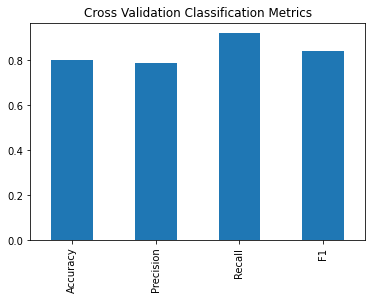

In [63]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title="Cross Validation Classification Metrics",
                      legend=False)

## Importing test.csv

In [67]:
test = pd.read_csv("data/test.csv")

## Preprocessing test file

In [68]:
for label, content in test.items():
    if pd.api.types.is_string_dtype(content):
        test[label] = content.astype("category").cat.as_ordered()

In [69]:
for label, content in test.items():
    if not pd.api.types.is_numeric_dtype(content):
        test[label] = pd.Categorical(content).codes+1

In [70]:
test.head()

,id,title,author,text
0,20800,3671,386,2985
1,20801,3477,0,3424
2,20802,12,320,4421
3,20803,4090,355,2057
4,20804,2287,1577,414


In [71]:
# Make predictions on the test data
test_preds = model.predict(test)

In [84]:
sub_score = test_preds

In [74]:
test.shape

(5200, 4)

In [80]:
test.drop("title", axis=1,inplace=True)

In [81]:
test.drop("author",axis=1,inplace=True)

In [82]:
test.drop("text",axis=1,inplace=True)

In [83]:
test

,id
0,20800
1,20801
2,20802
3,20803
4,20804
...,...
5195,25995
5196,25996
5197,25997
5198,25998


In [86]:
val=[]
for i in sub_score:
    val.append(i)


In [87]:
val

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [89]:
test_id = test["id"]

In [91]:
submission = pd.DataFrame({'id':test_id, 'label':val})
submission.shape

(5200, 2)

In [92]:
# Export prediction data
submission.to_csv("data/test_predictions_fake_news.csv", index=False)